# EDA, Preprocessing, and Clustering
- Visualize and analyze the OkCupid dataset
- provide descriptive statistics
- feature engineer where possible
- Preprocess for Cluserting
- Cluster For Adding to Speed Dating Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv(r"okcupid_cleaned.csv") # Load the dataset

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           10922 non-null  int64  
 1   status        10922 non-null  object 
 2   sex           10922 non-null  object 
 3   orientation   10922 non-null  object 
 4   body_type     10922 non-null  object 
 5   diet          10922 non-null  object 
 6   drinks        10922 non-null  object 
 7   drugs         10922 non-null  object 
 8   education     10922 non-null  object 
 9   ethnicity     10922 non-null  object 
 10  height        10922 non-null  float64
 11  income        10922 non-null  float64
 12  job           10922 non-null  object 
 13  pets          10922 non-null  object 
 14  religion      10922 non-null  object 
 15  sign          10922 non-null  object 
 16  smokes        10922 non-null  object 
 17  all_essays    10922 non-null  object 
 18  word_count    10922 non-nu

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,pets,religion,sign,smokes,all_essays,word_count,multilingual
0,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,i am a chef: this is what that means. 1. i am ...,272,True
1,23,single,m,straight,thin,vegetarian,socially,never,working on college/university,white,71.0,20000.0,student,likes cats,agnosticism but not too serious about it,pisces,no,i work in a library and go to school. . . read...,78,True
2,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000.0,banking / financial / real estate,likes cats,christianity and very serious about it,leo,no,"i was born in wisconsin, grew up in iowa, and ...",824,True
3,30,single,f,straight,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000.0,sales / marketing / biz dev,has dogs and likes cats,christianity but not too serious about it,gemini,no,unknown,10,False
4,29,single,f,straight,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000.0,other,likes dogs and has cats,catholicism,taurus,no,unknowni have an awesome career working as a s...,438,False


In [3]:
print(df.describe(include='all'))

                 age  status    sex orientation body_type             diet  \
count   10922.000000   10922  10922       10922     10922            10922   
unique           NaN       4      2           3        12               18   
top              NaN  single      m    straight   average  mostly anything   
freq             NaN    9945   7943        9575      3398             7417   
mean       32.633675     NaN    NaN         NaN       NaN              NaN   
std         9.823352     NaN    NaN         NaN       NaN              NaN   
min        18.000000     NaN    NaN         NaN       NaN              NaN   
25%        26.000000     NaN    NaN         NaN       NaN              NaN   
50%        30.000000     NaN    NaN         NaN       NaN              NaN   
75%        38.000000     NaN    NaN         NaN       NaN              NaN   
max        69.000000     NaN    NaN         NaN       NaN              NaN   

          drinks  drugs                          education ethn

In [4]:
# Checking class distribution of categorical columns
categorical_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 
                    'drinks', 'drugs', 'education', 'ethnicity', 'job', 
                    'pets', 'religion', 'sign', 'smokes']
for col in categorical_cols:
    print(f"\nClass distribution for {col}:")
    print(df[col].value_counts())
    print("-" * 40)


Class distribution for status:
status
single            9945
seeing someone     456
available          438
married             83
Name: count, dtype: int64
----------------------------------------

Class distribution for sex:
sex
m    7943
f    2979
Name: count, dtype: int64
----------------------------------------

Class distribution for orientation:
orientation
straight    9575
gay          776
bisexual     571
Name: count, dtype: int64
----------------------------------------

Class distribution for body_type:
body_type
average           3398
athletic          2348
fit               2106
a little extra     721
thin               701
curvy              662
skinny             364
full figured       249
overweight         162
jacked             108
used up             69
rather not say      34
Name: count, dtype: int64
----------------------------------------

Class distribution for diet:
diet
mostly anything        7417
anything               1127
strictly anything       926
mostly v

**Numerical Data Summary:**

- **Age**: Ranges from 18 to 69 years, with an average of 32.6 years.
- **Height:** Ranges from 53 inches to 84 inches, with an average of 69 inches (5’9”).
- **Income:** Has a high standard deviation, mean = $59,989, but most users report low or missing income values.
- **Essay Word Count:** The average length of profile essays is 372 words, but varies widely (some have 0 words, max is 4,134 words).
- **Multilingual:** 52% of users report speaking more than one language.

## Visualizations

**Lets visualize some basic Demographic Visualizations**
- Distribution of Age
- Gender & Orientation Counts
- Education & Job Trends
- Lifestyle Preferences (Drinking, Drugs, Smoking)
- Income Distribution
- Word Count Analysis from Essays
- Word Cloud Distribution
- Relationship Status Distribution
- Ethnicity Distribution
- Pets Preference
- Religion Distribution
- Multilingual Users

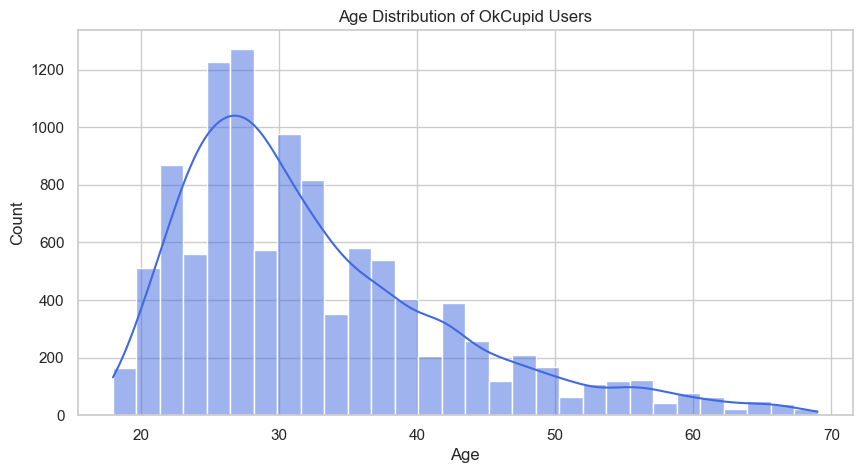

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=30, kde=True, color="royalblue")
plt.title("Age Distribution of OkCupid Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

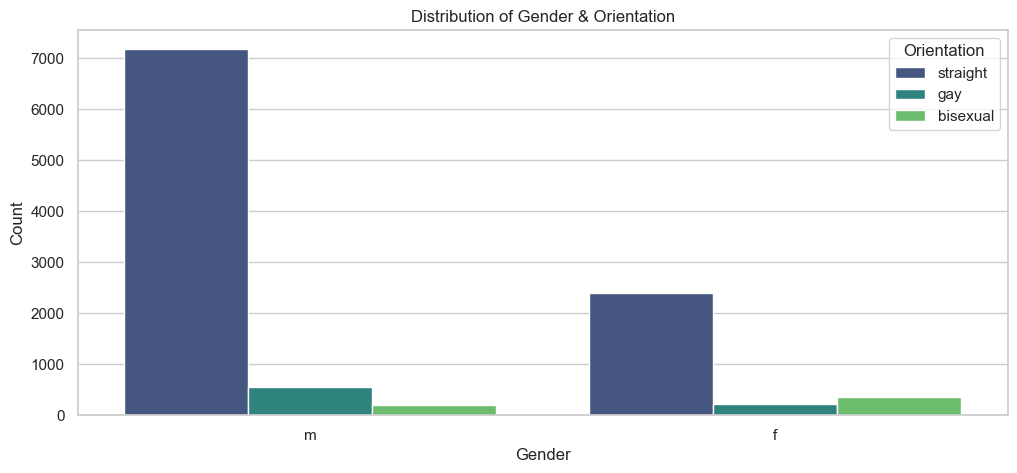

In [9]:
# 2. Gender & Orientation Counts
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="sex", hue="orientation", palette="viridis")
plt.title("Distribution of Gender & Orientation")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Orientation")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\369542580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_edu.index, x=top_edu.values, palette="coolwarm")


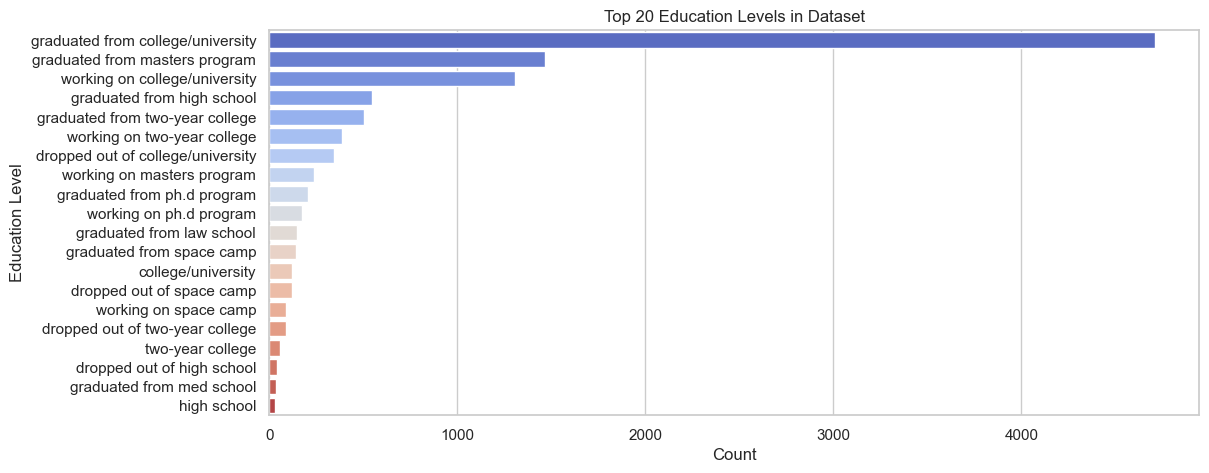

In [10]:
# 3. Education Levels
plt.figure(figsize=(12, 5))
top_edu = df["education"].value_counts().nlargest(20) # top 20
sns.barplot(y=top_edu.index, x=top_edu.values, palette="coolwarm")
plt.title("Top 20 Education Levels in Dataset")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

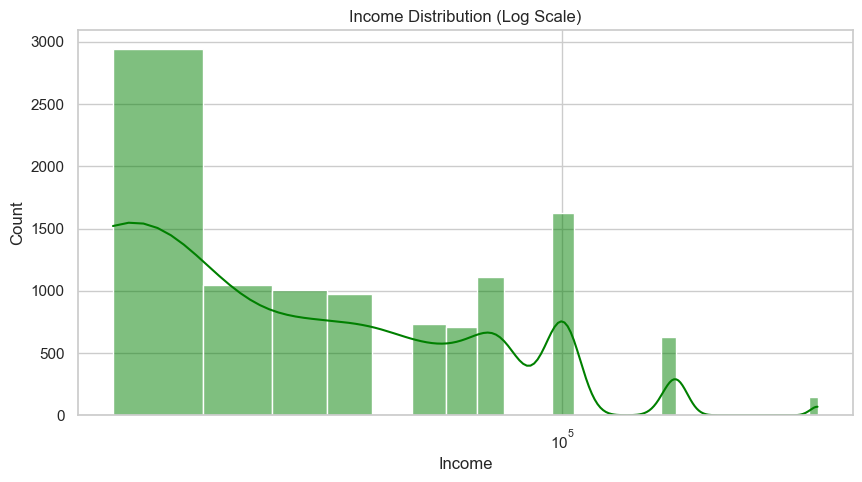

In [11]:
# 4. Income Distribution (With Log Scale for better view)
plt.figure(figsize=(10, 5))
sns.histplot(df[df["income"] > 0]["income"], bins=30, kde=True, color="green")
plt.xscale("log")  # Log scale since income can vary greatly
plt.title("Income Distribution (Log Scale)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2031840758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2031840758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2031840758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].val

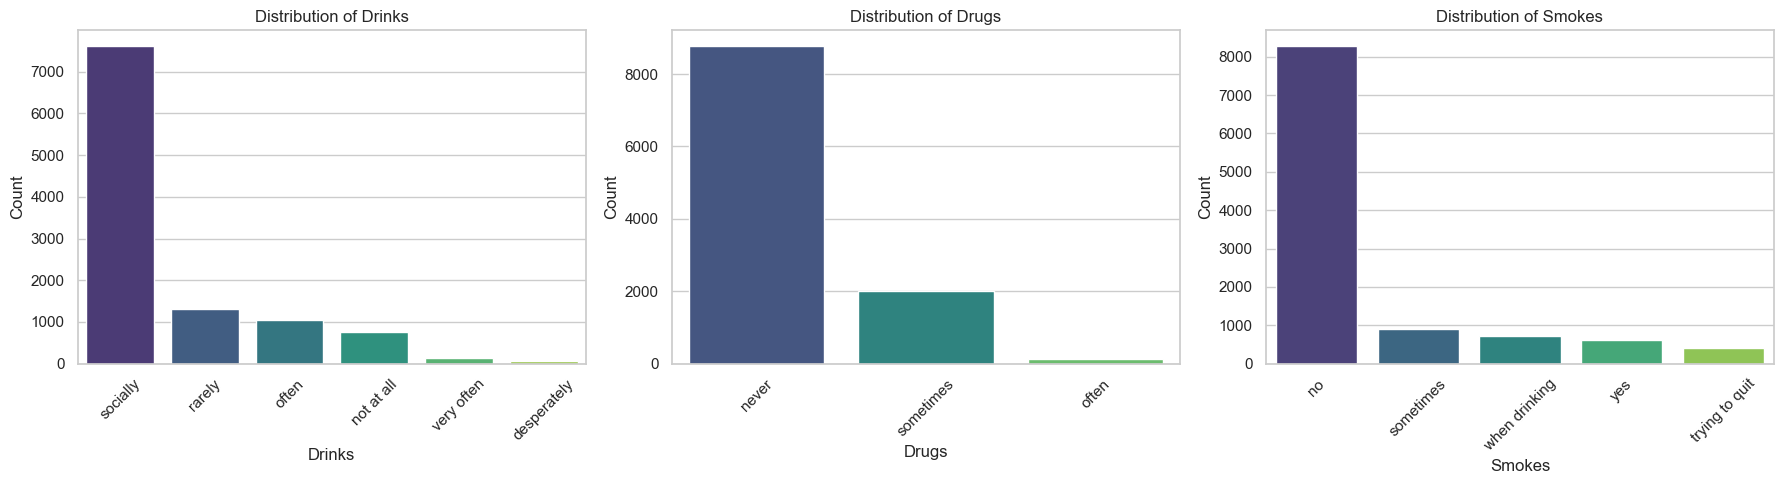

In [12]:
sns.set_style("whitegrid")

#  lifestyle preference columns
lifestyle_cols = ["drinks", "drugs", "smokes"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot bar charts for each lifestyle preference
for i, col in enumerate(lifestyle_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

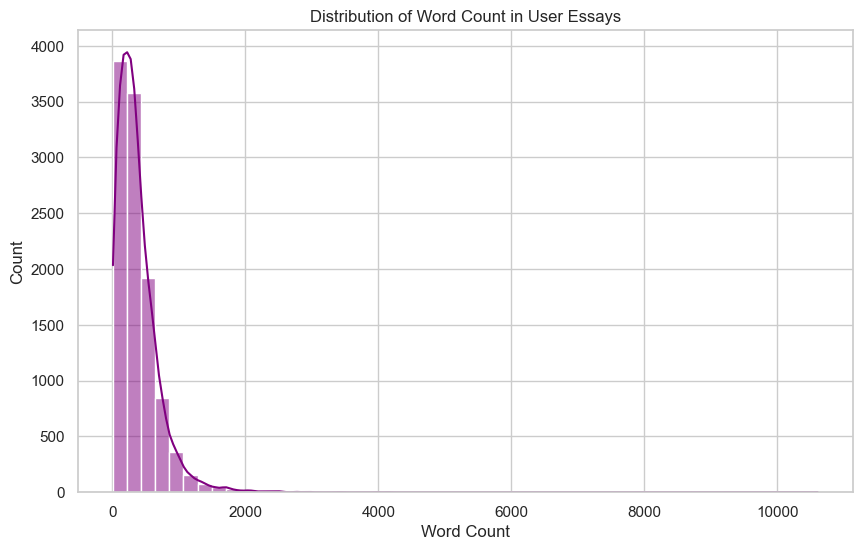

In [13]:
sns.set_style("whitegrid")

# Create histogram for word count
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color="purple")

plt.title("Distribution of Word Count in User Essays")
plt.xlabel("Word Count")
plt.ylabel("Count")

# Show plot
plt.show()


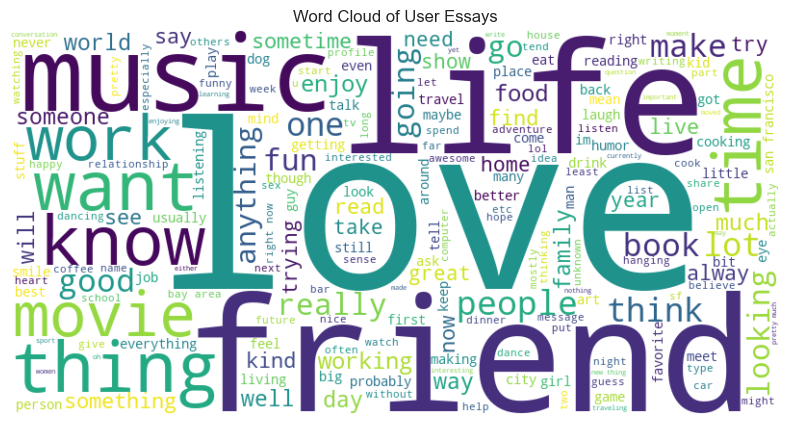

In [14]:
# Combine all text from the 'all_essays' column
text_data = " ".join(df["all_essays"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of User Essays")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2012126742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="status", order=df["status"].value_counts().index, palette="muted")


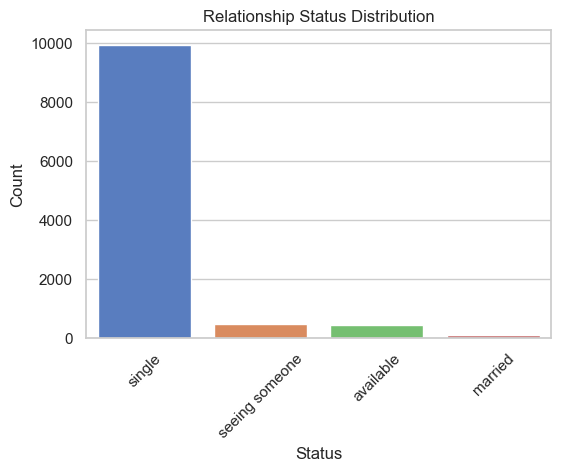

In [15]:
# Relationship Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="status", order=df["status"].value_counts().index, palette="muted")
plt.title("Relationship Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2709941823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ethnicities.values, y=top_ethnicities.index, palette="muted")


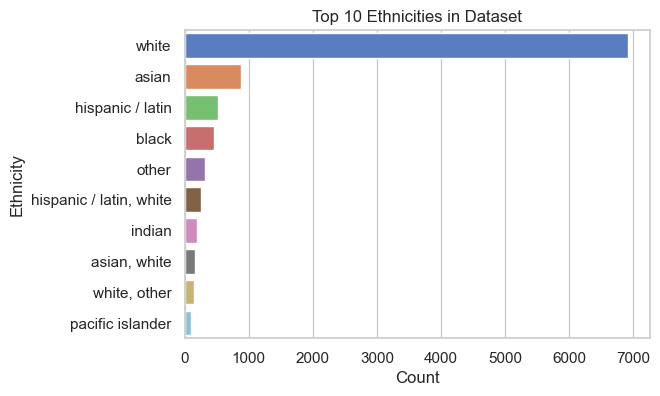

In [16]:
# Ethnicity Distribution (Top 10 most common)
plt.figure(figsize=(6, 4))
top_ethnicities = df["ethnicity"].value_counts().nlargest(10)
sns.barplot(x=top_ethnicities.values, y=top_ethnicities.index, palette="muted")
plt.title("Top 10 Ethnicities in Dataset")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\4154644064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="pets", order=df["pets"].value_counts().index, palette="muted")


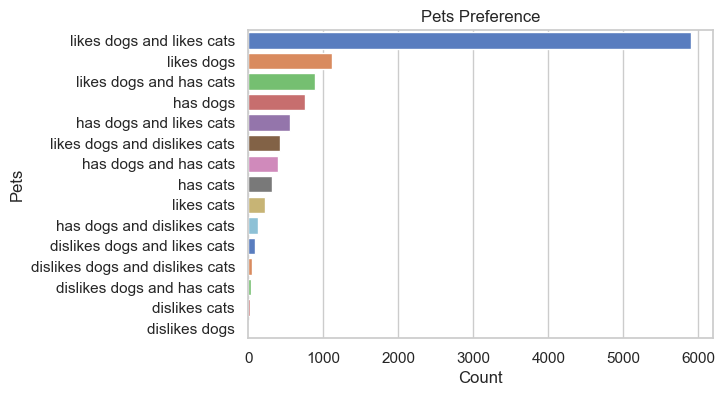

In [17]:
# Pets Preference
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="pets", order=df["pets"].value_counts().index, palette="muted")
plt.title("Pets Preference")
plt.xlabel("Count")
plt.ylabel("Pets")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\867123164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_religions.values, y=top_religions.index, palette="muted")


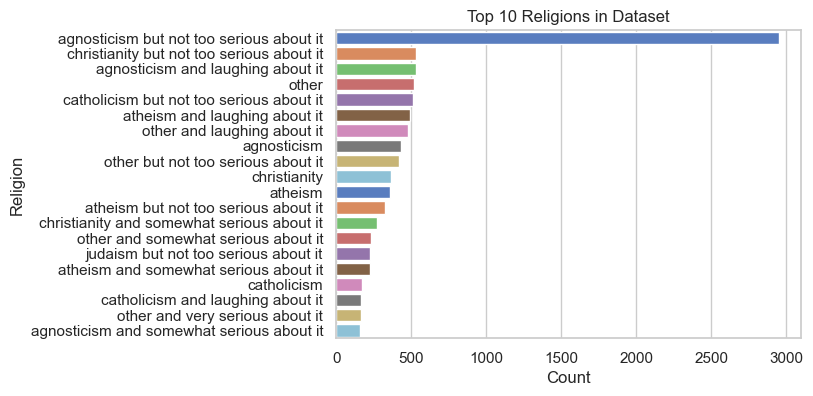

In [18]:
# Religion Distribution (Top 20 most common)
plt.figure(figsize=(6, 4))
top_religions = df["religion"].value_counts().nlargest(20)
sns.barplot(x=top_religions.values, y=top_religions.index, palette="muted")
plt.title("Top 10 Religions in Dataset")
plt.xlabel("Count")
plt.ylabel("Religion")
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\109057951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="multilingual", palette="muted")


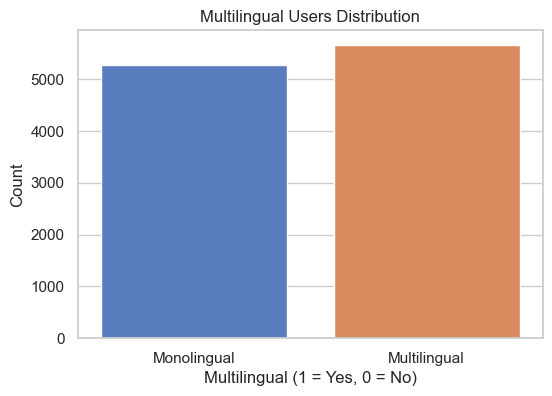

In [19]:
# Multilingual Users
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="multilingual", palette="muted")
plt.title("Multilingual Users Distribution")
plt.xlabel("Multilingual (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Monolingual", "Multilingual"])
plt.show()

- **Income Distribution:** The majority of users report lower incomes, with a few high-income outliers. The log scale highlights skewness.
- **Education Levels:** Most users have graduated from college or university, followed by master's programs. Few users have lower educational attainment.
- **Gender & Orientation Distribution:** The majority of users are male and straight, with smaller proportions identifying as gay or bisexual.
- **Age Distribution:** Most users fall within the 20s to early 30s, with a decline in older age groups.
- **Lifestyle Preferences Distribution:**
    - **Drinking:** Majority of users drink socially, while fewer drink rarely, often, or not at all. Very few identify as drinking often.
    - **Drugs:** Most Users never us drugs, but a small portion reports using sometimes or often
    - **Smoking:** Vast majority of users do not smoke, while some smoke sometimes, when drinking or are trying to quit
- **Word Count Distribution:** Most write relatively short essays with a peak around 100-300 words. But there are some users with essays exceeding 2000-3000 words
- **Word Cloud:** The most frequently used words include "love," "life," "friend," "music," "work," and "time."
- **Relationship Status Distribution:** The majority of users are single, with far fewer in relationships or married. This aligns with the dataset being from a dating platform.
- **Ethnicity Distribution:** The dataset is predominantly composed of White users, with smaller representation from other ethnic groups such as Asian, Hispanic/Latin, and Black.
- **Pets Preference:** The most common preference is liking both dogs and cats, followed by liking only dogs. Very few users dislike pets altogether.
- **Religion Distribution:** The most common religion-related response is "agnosticism but not too serious about it," followed by Christianity and atheism with varying levels of seriousness. This suggests a mix of religious and non-religious individuals in the dataset.
- **Multilingual Users:** The dataset has a relatively even split between monolingual and multilingual users, indicating a diverse linguistic background among users.

## Preprocessing to Prepare Dataset for Clustering and Feature Engineering

In [22]:
# Display the number of unique values in each categorical column
df.select_dtypes(include=['object']).nunique()

status             4
sex                2
orientation        3
body_type         12
diet              18
drinks             6
drugs              3
education         31
ethnicity        127
job               21
pets              15
religion          45
sign              12
smokes             5
all_essays     10558
dtype: int64

- **Encoding Categorical Variables**
    - Convert categorical features (ex. sex, orientation, diet, drinks, drugs, smokes) into numerical representations for machine learning.
    - One-Hot Encoding, label encoding, grouping and binary
    - Binary encoding: sex
    - One-Hot Encoding (Few Unique Values): status, orientation, body_type, diet (maybe grouping), drinks, drugs, smokes, job (maybe grouping)
    - Label Encoding (ordered categories): education
    - Grouping (too many unique values): ethnicity (possible target encoding or drop), job (if needed), religion, pets, diet (if needed)
    - Potential Drop: signs and zodiac signs may not be relevant
    - Feature Creation: all_essays (extract sentiment analysis)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           10922 non-null  int64  
 1   status        10922 non-null  object 
 2   sex           10922 non-null  object 
 3   orientation   10922 non-null  object 
 4   body_type     10922 non-null  object 
 5   diet          10922 non-null  object 
 6   drinks        10922 non-null  object 
 7   drugs         10922 non-null  object 
 8   education     10922 non-null  object 
 9   ethnicity     10922 non-null  object 
 10  height        10922 non-null  float64
 11  income        10922 non-null  float64
 12  job           10922 non-null  object 
 13  pets          10922 non-null  object 
 14  religion      10922 non-null  object 
 15  sign          10922 non-null  object 
 16  smokes        10922 non-null  object 
 17  all_essays    10922 non-null  object 
 18  word_count    10922 non-nu

In [25]:
# identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'pets', 'religion', 'sign', 'smokes', 'all_essays']


In [26]:
# binary encoding for sex
df["sex"] = df["sex"].map({"m": 1, "f": 0})

In [27]:
df['sex'].value_counts()

sex
1    7943
0    2979
Name: count, dtype: int64

In [28]:
# one hot encoding the columns listed above, will leave out job and diet until further analysis
df = pd.get_dummies(df, columns=['status', 'orientation', 'body_type', 'drinks', 'drugs', 'smokes'], drop_first=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10922 non-null  int64  
 1   sex                       10922 non-null  int64  
 2   diet                      10922 non-null  object 
 3   education                 10922 non-null  object 
 4   ethnicity                 10922 non-null  object 
 5   height                    10922 non-null  float64
 6   income                    10922 non-null  float64
 7   job                       10922 non-null  object 
 8   pets                      10922 non-null  object 
 9   religion                  10922 non-null  object 
 10  sign                      10922 non-null  object 
 11  all_essays                10922 non-null  object 
 12  word_count                10922 non-null  int64  
 13  multilingual              10922 non-null  bool   
 14  status

In [30]:
# apply label encoding to education
le = LabelEncoder()
df["education"] = le.fit_transform(df["education"])

In [31]:
df['education'].value_counts()

education
9     4712
12    1468
23    1307
10     546
16     505
30     385
1      345
26     239
14     204
28     176
11     146
15     140
0      123
7      120
29      91
8       90
22      56
2       41
13      34
17      32
4       32
27      29
6       23
24      22
25      22
19      10
21      10
3        4
5        4
20       4
18       2
Name: count, dtype: int64

In [32]:
df.head()

,age,sex,diet,education,ethnicity,height,income,job,pets,religion,...,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,35,1,mostly other,29,white,70.0,80000.0,hospitality / travel,likes dogs and likes cats,agnosticism but not too serious about it,...,True,False,False,False,False,True,False,False,False,False
1,23,1,vegetarian,23,white,71.0,20000.0,student,likes cats,agnosticism but not too serious about it,...,False,False,True,False,False,False,False,False,False,False
2,28,1,mostly anything,9,white,72.0,40000.0,banking / financial / real estate,likes cats,christianity and very serious about it,...,False,False,True,False,False,False,False,False,False,False
3,30,0,mostly anything,10,white,66.0,30000.0,sales / marketing / biz dev,has dogs and likes cats,christianity but not too serious about it,...,False,False,True,False,False,False,False,False,False,False
4,29,0,mostly anything,23,"hispanic / latin, white",62.0,50000.0,other,likes dogs and has cats,catholicism,...,False,False,True,False,False,False,False,False,False,False


In [33]:
# Show all unique values for each grouping column candidate
print("Unique values in 'ethnicity':")
print(df['ethnicity'].unique())

print("\nUnique values in 'job':")
print(df['job'].unique())

print("\nUnique values in 'diet':")
print(df['diet'].unique())


Unique values in 'ethnicity':
['white' 'hispanic / latin, white' 'asian' 'native american, white'
 'indian' 'black, native american, hispanic / latin' 'hispanic / latin'
 'white, other' 'black' 'black, native american, white' 'other'
 'hispanic / latin, white, other' 'middle eastern, white'
 'native american, hispanic / latin, white' 'indian, white, other'
 'black, white' 'asian, white' 'asian, pacific islander'
 'black, native american, hispanic / latin, white, other'
 'pacific islander' 'pacific islander, hispanic / latin'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'asian, black' 'indian, white' 'middle eastern, indian'
 'hispanic / latin, other' 'pacific islander, white' 'middle eastern'
 'black, hispanic / latin' 'asian, pacific islander, other'
 'black, native american, hispanic / latin, white' 'black, other'
 'asian, black, native american, hispanic / latin, white'
 'asian, pacific islander, white' 'middle eastern, 

In [34]:
# Count occurrences of each unique value
print("\nEthnicity value counts:")
print(df['ethnicity'].value_counts())

print("\nJob value counts:")
print(df['job'].value_counts())

print("\nDiet value counts:")
print(df['diet'].value_counts())

# find unique values of pets
print(df["pets"].value_counts())


Ethnicity value counts:
ethnicity
white                                                                6909
asian                                                                 881
hispanic / latin                                                      526
black                                                                 463
other                                                                 319
                                                                     ... 
middle eastern, native american, hispanic / latin                       1
asian, native american, pacific islander, hispanic / latin, white       1
asian, middle eastern, hispanic / latin, white                          1
middle eastern, indian, white, other                                    1
asian, black, indian                                                    1
Name: count, Length: 127, dtype: int64

Job value counts:
job
other                                1772
computer / hardware / software       1125
artis

- We will map each diet category into one of five broader categories:

- Anything → Includes "anything", "mostly anything", "strictly anything"
- Vegetarian → Includes "vegetarian", "mostly vegetarian", "strictly vegetarian"
- Vegan → Includes "vegan", "mostly vegan", "strictly vegan"
- Halal/Kosher → Includes "halal", "kosher", "mostly halal", "mostly kosher", "strictly halal", "strictly kosher"
- Other → Includes "other", "mostly other", "strictly other"

In [36]:
# Define the mapping for diet categories
diet_mapping = {
    "anything": "Anything", "mostly anything": "Anything", "strictly anything": "Anything",
    "vegetarian": "Vegetarian", "mostly vegetarian": "Vegetarian", "strictly vegetarian": "Vegetarian",
    "vegan": "Vegan", "mostly vegan": "Vegan", "strictly vegan": "Vegan",
    "halal": "Halal/Kosher", "kosher": "Halal/Kosher",
    "mostly halal": "Halal/Kosher", "mostly kosher": "Halal/Kosher",
    "strictly halal": "Halal/Kosher", "strictly kosher": "Halal/Kosher",
    "other": "Other", "mostly other": "Other", "strictly other": "Other"
}

# Apply the mapping to the 'diet' column
df["diet_grouped"] = df["diet"].map(diet_mapping)

# Verify
print(df["diet_grouped"].value_counts())

diet_grouped
Anything        9470
Vegetarian       858
Other            389
Vegan            155
Halal/Kosher      50
Name: count, dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10922 non-null  int64  
 1   sex                       10922 non-null  int64  
 2   diet                      10922 non-null  object 
 3   education                 10922 non-null  int32  
 4   ethnicity                 10922 non-null  object 
 5   height                    10922 non-null  float64
 6   income                    10922 non-null  float64
 7   job                       10922 non-null  object 
 8   pets                      10922 non-null  object 
 9   religion                  10922 non-null  object 
 10  sign                      10922 non-null  object 
 11  all_essays                10922 non-null  object 
 12  word_count                10922 non-null  int64  
 13  multilingual              10922 non-null  bool   
 14  status

In [38]:
# one-hot encoding on the grouped diet column
df = pd.get_dummies(df, columns=["diet_grouped"], prefix="diet", dtype=int)

# Verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10922 non-null  int64  
 1   sex                       10922 non-null  int64  
 2   diet                      10922 non-null  object 
 3   education                 10922 non-null  int32  
 4   ethnicity                 10922 non-null  object 
 5   height                    10922 non-null  float64
 6   income                    10922 non-null  float64
 7   job                       10922 non-null  object 
 8   pets                      10922 non-null  object 
 9   religion                  10922 non-null  object 
 10  sign                      10922 non-null  object 
 11  all_essays                10922 non-null  object 
 12  word_count                10922 non-null  int64  
 13  multilingual              10922 non-null  bool   
 14  status

- We will map job into the below categories:

- STEM	"science / tech / engineering", "computer / hardware / software"
- Healthcare	"medicine / health"
- Education	"education / academia"
- Finance	"banking / financial / real estate"
- Art/Entertainment	"artistic / musical / writer", "entertainment / media"
- Business	"sales / marketing / biz dev", "executive / management"
- Legal	"law / legal services"
- Public Sector	"political / government", "military"
- Trades	"construction / craftsmanship", "transportation"
- Service Industry	"hospitality / travel", "clerical / administrative"
- Unemployed	"unemployed"
- Retired	"retired"
- Other	"student", "rather not say", "other"

In [40]:
# Function to group jobs
def group_job(job):
    job = str(job).lower()

    if job in ["science / tech / engineering", "computer / hardware / software"]:
        return "STEM"
    elif job == "medicine / health":
        return "Healthcare"
    elif job == "education / academia":
        return "Education"
    elif job == "banking / financial / real estate":
        return "Finance"
    elif job in ["artistic / musical / writer", "entertainment / media"]:
        return "Art/Entertainment"
    elif job in ["sales / marketing / biz dev", "executive / management"]:
        return "Business"
    elif job == "law / legal services":
        return "Legal"
    elif job in ["political / government", "military"]:
        return "Public Sector"
    elif job in ["construction / craftsmanship", "transportation"]:
        return "Trades"
    elif job in ["hospitality / travel", "clerical / administrative"]:
        return "Service Industry"
    elif job == "unemployed":
        return "Unemployed"
    elif job == "retired":
        return "Retired"
    else:
        return "Other"

# Apply grouping function
df["job_grouped"] = df["job"].apply(group_job)

# Verify results
print(df["job_grouped"].value_counts())

job_grouped
Other                2782
STEM                 2069
Art/Entertainment    1389
Business             1371
Education             709
Healthcare            617
Service Industry      524
Trades                478
Finance               351
Public Sector         280
Legal                 209
Unemployed             93
Retired                50
Name: count, dtype: int64


In [41]:
# apply one hot encoding to job_grouped

df = pd.get_dummies(df, columns=["job_grouped"], prefix="job", dtype=int)

# Verify encoding
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10922 non-null  int64  
 1   sex                       10922 non-null  int64  
 2   diet                      10922 non-null  object 
 3   education                 10922 non-null  int32  
 4   ethnicity                 10922 non-null  object 
 5   height                    10922 non-null  float64
 6   income                    10922 non-null  float64
 7   job                       10922 non-null  object 
 8   pets                      10922 non-null  object 
 9   religion                  10922 non-null  object 
 10  sign                      10922 non-null  object 
 11  all_essays                10922 non-null  object 
 12  word_count                10922 non-null  int64  
 13  multilingual              10922 non-null  bool   
 14  status

In [42]:
# Display all unique values in ethnicity column

ethnicity_values = sorted(df["ethnicity"].unique())  # Sort values alphabetically
for value in ethnicity_values:
    print(value)

asian
asian, black
asian, black, hispanic / latin, white, other
asian, black, indian
asian, black, native american
asian, black, native american, hispanic / latin
asian, black, native american, hispanic / latin, white
asian, black, native american, indian, pacific islander, hispanic / latin
asian, black, native american, pacific islander
asian, black, native american, pacific islander, white, other
asian, black, native american, white
asian, black, pacific islander
asian, black, pacific islander, other
asian, black, pacific islander, white
asian, black, white
asian, hispanic / latin
asian, hispanic / latin, other
asian, hispanic / latin, white
asian, hispanic / latin, white, other
asian, indian
asian, indian, hispanic / latin
asian, indian, pacific islander
asian, indian, white
asian, middle eastern
asian, middle eastern, black, indian, pacific islander, hispanic / latin, white
asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white
asian, middl

In [43]:
# Function to group ethnicities into broader categories
def group_ethnicity(value):
    value = value.lower()
    if "white" in value and "," not in value:
        return "White"
    elif "black" in value and "," not in value:
        return "Black"
    elif "hispanic / latin" in value and "," not in value:
        return "Hispanic/Latino"
    elif "asian" in value and "," not in value:
        return "Asian"
    elif "middle eastern" in value and "," not in value:
        return "Middle Eastern"
    elif "indian" in value and "," not in value:
        return "Indian"
    elif "native american" in value and "," not in value:
        return "Native American"
    elif "pacific islander" in value and "," not in value:
        return "Pacific Islander"
    elif "," in value:  # Mixed ethnicities
        return "Mixed/Multiple Ethnicities"
    else:
        return "Other"  # Catch-all for uncommon responses

# Apply function to ethnicity column
df["ethnicity_grouped"] = df["ethnicity"].apply(group_ethnicity)

# Check value counts after grouping
print(df["ethnicity_grouped"].value_counts())

ethnicity_grouped
White                         6909
Mixed/Multiple Ethnicities    1477
Asian                          881
Hispanic/Latino                526
Black                          463
Other                          319
Indian                         185
Pacific Islander                93
Middle Eastern                  51
Native American                 18
Name: count, dtype: int64


In [44]:
# one hot encoding for ethnicity grouped
df = pd.get_dummies(df, columns=["ethnicity_grouped"], prefix="ethnicity", dtype=int)

# Verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   diet                                  10922 non-null  object 
 3   education                             10922 non-null  int32  
 4   ethnicity                             10922 non-null  object 
 5   height                                10922 non-null  float64
 6   income                                10922 non-null  float64
 7   job                                   10922 non-null  object 
 8   pets                                  10922 non-null  object 
 9   religion                              10922 non-null  object 
 10  sign                                  10922 non-null  object 
 11  all_essays     

In [45]:
# find unique values of pets
print(df["pets"].unique())

['likes dogs and likes cats' 'likes cats' 'has dogs and likes cats'
 'likes dogs and has cats' 'likes dogs' 'has cats'
 'likes dogs and dislikes cats' 'has dogs and dislikes cats' 'has dogs'
 'has dogs and has cats' 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs'
 'dislikes dogs and has cats']


- We will create the following new binary columns:

- pets_likes_dogs: 1 if the person likes dogs, 0 otherwise.
- pets_likes_cats: 1 if the person likes cats, 0 otherwise.
- pets_has_dogs: 1 if the person has a dog, 0 otherwise.
- pets_has_cats: 1 if the person has a cat, 0 otherwise.
- pets_dislikes_dogs: 1 if the person dislikes dogs, 0 otherwise.
- pets_dislikes_cats: 1 if the person dislikes cats, 0 otherwise.

In [47]:
# Creating binary pet preference features
df["pets_likes_dogs"] = df["pets"].apply(lambda x: 1 if "likes dogs" in x else 0)
df["pets_likes_cats"] = df["pets"].apply(lambda x: 1 if "likes cats" in x else 0)
df["pets_has_dogs"] = df["pets"].apply(lambda x: 1 if "has dogs" in x else 0)
df["pets_has_cats"] = df["pets"].apply(lambda x: 1 if "has cats" in x else 0)
df["pets_dislikes_dogs"] = df["pets"].apply(lambda x: 1 if "dislikes dogs" in x else 0)
df["pets_dislikes_cats"] = df["pets"].apply(lambda x: 1 if "dislikes cats" in x else 0)

# Drop the original pets column
df.drop(columns=["pets"], inplace=True)

# Verify the changes
print(df[["pets_likes_dogs", "pets_likes_cats", "pets_has_dogs", "pets_has_cats", "pets_dislikes_dogs", "pets_dislikes_cats"]].head())

   pets_likes_dogs  pets_likes_cats  pets_has_dogs  pets_has_cats  \
0                1                1              0              0   
1                0                1              0              0   
2                0                1              0              0   
3                0                1              1              0   
4                1                0              0              1   

   pets_dislikes_dogs  pets_dislikes_cats  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 74 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   diet                                  10922 non-null  object 
 3   education                             10922 non-null  int32  
 4   ethnicity                             10922 non-null  object 
 5   height                                10922 non-null  float64
 6   income                                10922 non-null  float64
 7   job                                   10922 non-null  object 
 8   religion                              10922 non-null  object 
 9   sign                                  10922 non-null  object 
 10  all_essays                            10922 non-null  object 
 11  word_count     

In [49]:
df["religion"].unique()

array(['agnosticism but not too serious about it',
       'christianity and very serious about it',
       'christianity but not too serious about it', 'catholicism',
       'buddhism and laughing about it',
       'agnosticism and very serious about it',
       'hinduism but not too serious about it',
       'catholicism but not too serious about it', 'agnosticism',
       'catholicism and laughing about it',
       'atheism but not too serious about it', 'other',
       'agnosticism and laughing about it',
       'hinduism and very serious about it',
       'agnosticism and somewhat serious about it',
       'christianity and laughing about it',
       'buddhism but not too serious about it',
       'christianity and somewhat serious about it', 'atheism',
       'other and very serious about it', 'other and laughing about it',
       'christianity', 'other and somewhat serious about it',
       'atheism and somewhat serious about it',
       'judaism but not too serious about it',
  

In [50]:
# function to clean and group religion categories and takes 'serious' and 'laughing' and leaves religion
def group_religion(value):
    value = value.lower() 
    
    if "atheism" in value:
        return "Atheism"
    elif "agnosticism" in value:
        return "Agnosticism"
    elif "christianity" in value or "catholicism" in value:
        return "Christianity"
    elif "islam" in value:
        return "Islam"
    elif "hinduism" in value:
        return "Hinduism"
    elif "buddhism" in value:
        return "Buddhism"
    elif "judaism" in value:
        return "Judaism"
    elif "other" in value:
        return "Other"
    else:
        return "Other"  # Default category if nothing matches

# Apply function to clean and group religions
df["religion_grouped"] = df["religion"].apply(group_religion)

# Verify results
print(df["religion_grouped"].value_counts())

religion_grouped
Agnosticism     4165
Christianity    2407
Other           1814
Atheism         1560
Judaism          439
Buddhism         415
Hinduism          87
Islam             35
Name: count, dtype: int64


In [51]:
# Apply one-hot encoding to the new religion column
df = pd.get_dummies(df, columns=["religion_grouped"], prefix="religion", dtype=int)

# Verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   diet                                  10922 non-null  object 
 3   education                             10922 non-null  int32  
 4   ethnicity                             10922 non-null  object 
 5   height                                10922 non-null  float64
 6   income                                10922 non-null  float64
 7   job                                   10922 non-null  object 
 8   religion                              10922 non-null  object 
 9   sign                                  10922 non-null  object 
 10  all_essays                            10922 non-null  object 
 11  word_count     

In [52]:
# dropping columns that have been encoded
df.drop(columns=['diet', 'ethnicity', 'job', 'religion'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int32  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   sign                                  10922 non-null  object 
 6   all_essays                            10922 non-null  object 
 7   word_count                            10922 non-null  int64  
 8   multilingual                          10922 non-null  bool   
 9   status_married                        10922 non-null  bool   
 10  status_seeing someone                 10922 non-null  bool   
 11  status_single  

In [53]:
# dropping sign as it's likely not important
df.drop(columns=['sign'], inplace=True)

What to do with all_essays column?
- Sentiment Analysis → Determines if the essay is positive, neutral, or negative
- TF-IDF or Bag of Words → Represents common words for potential clustering

In [55]:
# Compute sentiment polarity (-1 to 1)
df['essay_sentiment'] = df['all_essays'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

#vverify
df[['all_essays', 'essay_sentiment']].sample(5)  # Check a few rows

,all_essays,essay_sentiment
7865,unknownask me ask me ;) unknownhaha ask if u d...,0.075000
5707,i really needed to update this so here we go h...,0.260214
4371,unknown,-0.100000
1035,"tall dark handsome and single ,born and raise ...",0.150255
5996,i have incredibly high energy with interests t...,0.236386


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int32  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   all_essays                            10922 non-null  object 
 6   word_count                            10922 non-null  int64  
 7   multilingual                          10922 non-null  bool   
 8   status_married                        10922 non-null  bool   
 9   status_seeing someone                 10922 non-null  bool   
 10  status_single                         10922 non-null  bool   
 11  orientation_gay

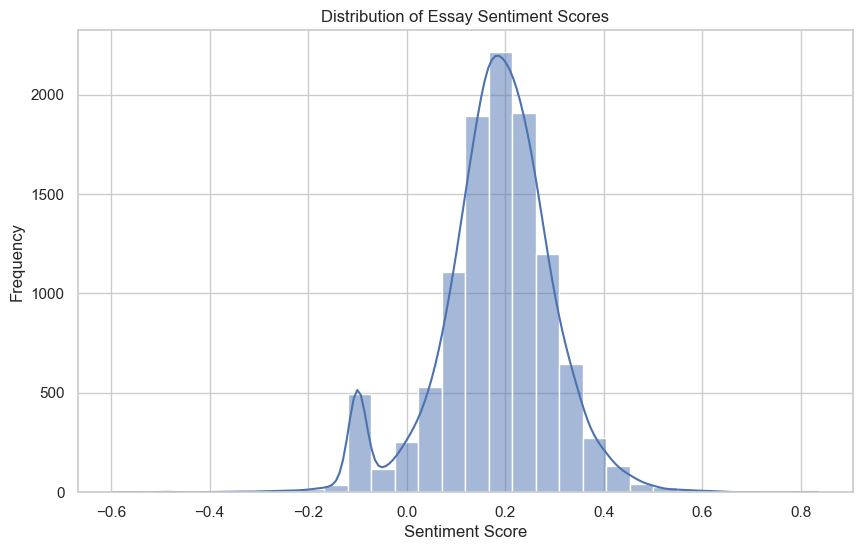

In [57]:
# visualizing sentiment distribution with hist plot
plt.figure(figsize=(10, 6))
sns.histplot(df['essay_sentiment'], bins=30, kde=True)

plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Essay Sentiment Scores")

plt.show()


- Distribution Shape: Right-skewed with a peak around 0.2 (slightly positive sentiment).
- Range: Sentiment scores span -0.6 to 0.8, mostly between -0.2 to 0.4 (neutral to slightly positive).
- Bimodal Trend: Small peak near 0.0 suggests a mix of neutral and slightly negative essays.
- Feature Engineering: Sentiment can be used as a predictor; consider binning into categories (Negative, Neutral, Positive).
- Next Steps: Analyze sentiment vs. word count, age, or relationship status to find patterns.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int32  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   all_essays                            10922 non-null  object 
 6   word_count                            10922 non-null  int64  
 7   multilingual                          10922 non-null  bool   
 8   status_married                        10922 non-null  bool   
 9   status_seeing someone                 10922 non-null  bool   
 10  status_single                         10922 non-null  bool   
 11  orientation_gay

In [60]:
df.drop(columns=['all_essays'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int32  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   word_count                            10922 non-null  int64  
 6   multilingual                          10922 non-null  bool   
 7   status_married                        10922 non-null  bool   
 8   status_seeing someone                 10922 non-null  bool   
 9   status_single                         10922 non-null  bool   
 10  orientation_gay                       10922 non-null  bool   
 11  orientation_str

In [61]:
# Save the new cleaned dataset to a CSV file
df.to_csv("okcupid_clean2.csv", index=False)

# Feature Scaling

- Now that dataset is only numerical values, lets proceed with feature scaling before modeling
- We will visualize the distributions before deciding which scaler to use
- We will look at "age", "height", "income", "word_count", "essay_sentiment"

In [63]:
# Summary statistics of numerical columns
print(df.describe())

                age           sex     education        height         income  \
count  10922.000000  10922.000000  10922.000000  10922.000000   10922.000000   
mean      32.633675      0.727248     13.037722     69.072606   59989.928585   
std        9.823352      0.445395      7.012778      3.737194   42501.769508   
min       18.000000      0.000000      0.000000     53.000000   20000.000000   
25%       26.000000      0.000000      9.000000     67.000000   20000.000000   
50%       30.000000      1.000000      9.000000     69.000000   50000.000000   
75%       38.000000      1.000000     16.000000     72.000000   80000.000000   
max       69.000000      1.000000     30.000000     84.000000  250000.000000   

         word_count  diet_Anything  diet_Halal/Kosher    diet_Other  \
count  10922.000000   10922.000000       10922.000000  10922.000000   
mean     373.876671       0.867057           0.004578      0.035616   
std      326.185053       0.339528           0.067508      0.18534

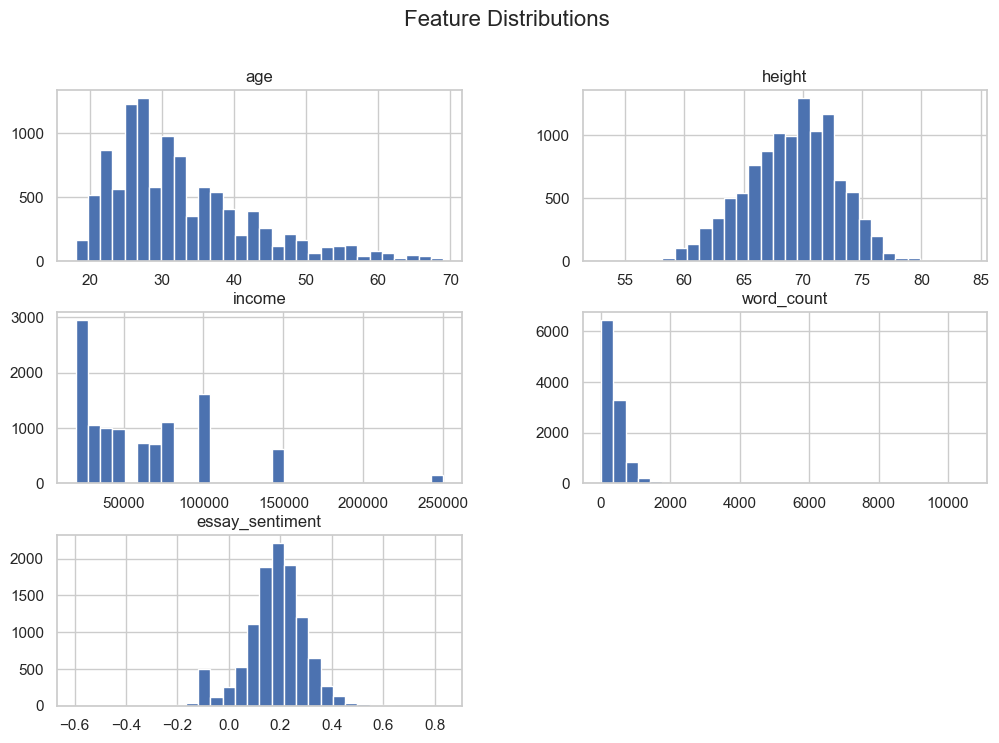

In [64]:
# Select numerical columns
numerical_cols = ["age", "height", "income", "word_count", "essay_sentiment"]

# Plot histograms
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

- Log Transformation: income, word_count (to reduce skewness).
- Standardization (Z-score Scaling): age, height, essay_sentiment (to ensure normal distribution with mean 0 and std 1).
- Binary and Categorical Variables: No need to scale.

In [66]:
df_scaled = df.copy()

# Apply log transformation to reduce skewness
df_scaled['income'] = np.log1p(df_scaled['income'])  # log1p handles zero values
df_scaled['word_count'] = np.log1p(df_scaled['word_count'])

# Standardization (Z-score Scaling) for normally distributed variables
scaler = StandardScaler()
df_scaled[['age', 'height', 'essay_sentiment']] = scaler.fit_transform(df_scaled[['age', 'height', 'essay_sentiment']])

# Verify
print(df_scaled.describe())

# Save the scaled dataset
df_scaled.to_csv("okcupid_scaled.csv", index=False)

                age           sex     education        height        income  \
count  1.092200e+04  10922.000000  10922.000000  1.092200e+04  10922.000000   
mean   2.068784e-16      0.727248     13.037722  6.089251e-16     10.773067   
std    1.000046e+00      0.445395      7.012778  1.000046e+00      0.679617   
min   -1.489751e+00      0.000000      0.000000 -4.300912e+00      9.903538   
25%   -6.753274e-01      0.000000      9.000000 -5.546142e-01      9.903538   
50%   -2.681158e-01      1.000000      9.000000 -1.942877e-02     10.819798   
75%    5.463075e-01      1.000000     16.000000  7.833493e-01     11.289794   
max    3.702198e+00      1.000000     30.000000  3.994462e+00     12.429220   

         word_count  diet_Anything  diet_Halal/Kosher    diet_Other  \
count  10922.000000   10922.000000       10922.000000  10922.000000   
mean       5.534479       0.867057           0.004578      0.035616   
std        1.034940       0.339528           0.067508      0.185340   
min 

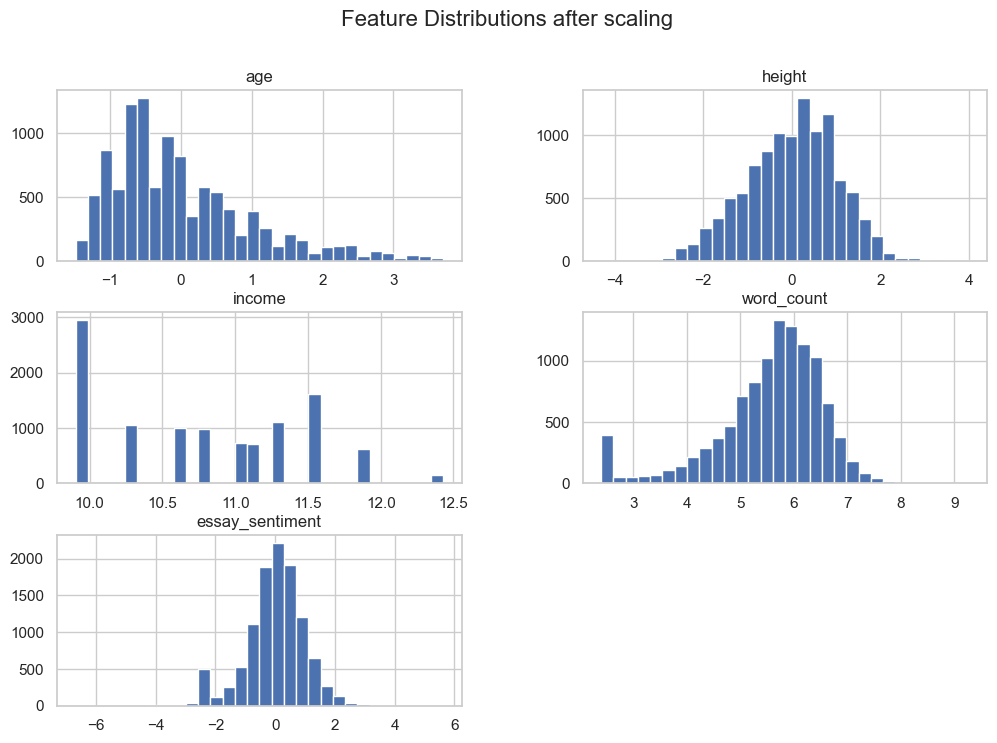

In [67]:
# Select numerical columns
numerical_cols = ["age", "height", "income", "word_count", "essay_sentiment"]

# Plot histograms
df_scaled[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions after scaling", fontsize=16)
plt.show()

In [68]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  float64
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int32  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   word_count                            10922 non-null  float64
 6   multilingual                          10922 non-null  bool   
 7   status_married                        10922 non-null  bool   
 8   status_seeing someone                 10922 non-null  bool   
 9   status_single                         10922 non-null  bool   
 10  orientation_gay                       10922 non-null  bool   
 11  orientation_str

# Feature Selection and Modeling

## Modeling
For this project, my goal is to determine what makes people compatible. Given there is no clear target variable for this dataset, I will proceed  with the unsupervised learning method of clustering. We will group users based on compatibility and shared interests rather than unrleated aspects like income or job title.

## Feature Selction
For clustering based on compatability, I will focus on features that reflect personality, lifestyle and interests rather than those that are less relevant to compatability. below is my list for features relevant to compatability:

**Keep for Clustering (Relevant to Compatibility)**

- Demographic Features (age, education, multilingual)

    - Age (scaled)
    - Education Level
    - Multilingual (1 = speaks multiple languages, 0 = monolingual)
  
- Personality & Lifestyle Preferences

    - Orientation (orientation_gay, orientation_straight)
    - Dietary Preferences (diet_Anything, diet_Halal/Kosher, diet_Other, diet_Vegan, diet_Vegetarian)
    - Drinking Habits (drinks_not at all, drinks_often, drinks_rarely, drinks_socially, drinks_very often)
    - Smoking & Drug Use (smokes_sometimes, smokes_trying to quit, smokes_when drinking, smokes_yes, drugs_often, drugs_sometimes)
    - Pets (pets_likes_dogs, pets_likes_cats, pets_has_cats, pets_dislikes_dogs, pets_dislikes_cats)

- Interests & Work

    - Job Categories (job_Art/Entertainment, job_Business, job_Education, job_Healthcare, job_STEM, job_Service Industry, etc.)
    - Word Count (proxy for verbosity or expressiveness)

- Social & Relationship Factors

    - Relationship Status (status_married, status_seeing someone, status_single)
    - Essay Sentiment (proxy for personality traits—positive or negative outlook)

- Religious & Cultural Background

    - Religion (religion_Agnosticism, religion_Atheism, religion_Buddhism, religion_Christianity, etc.)
    - Ethnicity (ethnicity_Asian, ethnicity_Black, ethnicity_Hispanic/Latino, ethnicity_White, etc.)

- We will proceed with the following clustering algorithms:
    - K-means
    - K-Means minibatch

In [74]:
features_for_clustering = [
    # Demographics
    "age", "education", "multilingual",

    # Personality & Lifestyle Preferences
    "orientation_gay", "orientation_straight",
    "diet_Anything", "diet_Halal/Kosher", "diet_Other", "diet_Vegan", "diet_Vegetarian",
    "drinks_not at all", "drinks_often", "drinks_rarely", "drinks_socially", "drinks_very often",
    "smokes_sometimes", "smokes_trying to quit", "smokes_when drinking", "smokes_yes",
    "drugs_often", "drugs_sometimes",
    "pets_likes_dogs", "pets_likes_cats", "pets_has_dogs", "pets_has_cats",
    "pets_dislikes_dogs", "pets_dislikes_cats",

    # Interests & Work
    "job_Art/Entertainment", "job_Business", "job_Education", "job_Finance", 
    "job_Healthcare", "job_Legal", "job_Other", "job_Public Sector", 
    "job_Retired", "job_STEM", "job_Service Industry", "job_Trades", "job_Unemployed",
    "word_count", 

    # Social & Relationship Factors
    "status_married", "status_seeing someone", "status_single",
    "essay_sentiment",

    # Religious & Cultural Background
    "religion_Agnosticism", "religion_Atheism", "religion_Buddhism", "religion_Christianity",
    "religion_Hinduism", "religion_Islam", "religion_Judaism", "religion_Other",
    "ethnicity_Asian", "ethnicity_Black", "ethnicity_Hispanic/Latino", "ethnicity_Indian",
    "ethnicity_Middle Eastern", "ethnicity_Mixed/Multiple Ethnicities",
    "ethnicity_Native American", "ethnicity_Other", "ethnicity_Pacific Islander", "ethnicity_White"
]

# Extracting the selected features for clustering
X = df_scaled[features_for_clustering]

In [75]:
# Finding the optimal number of clusters using Elbow Method
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    # Compute silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

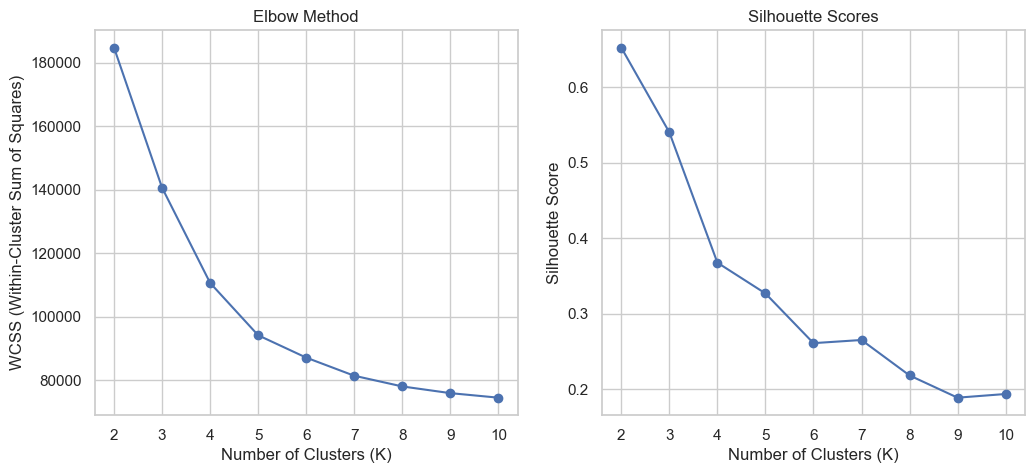

In [76]:
# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")

plt.show()

- K = 3 seems optimal as it balances both Elbow Method (WCSS bend) and Silhouette Score stability.
- K = 4 or 5 could still be reasonable if we want slightly finer segmentation.

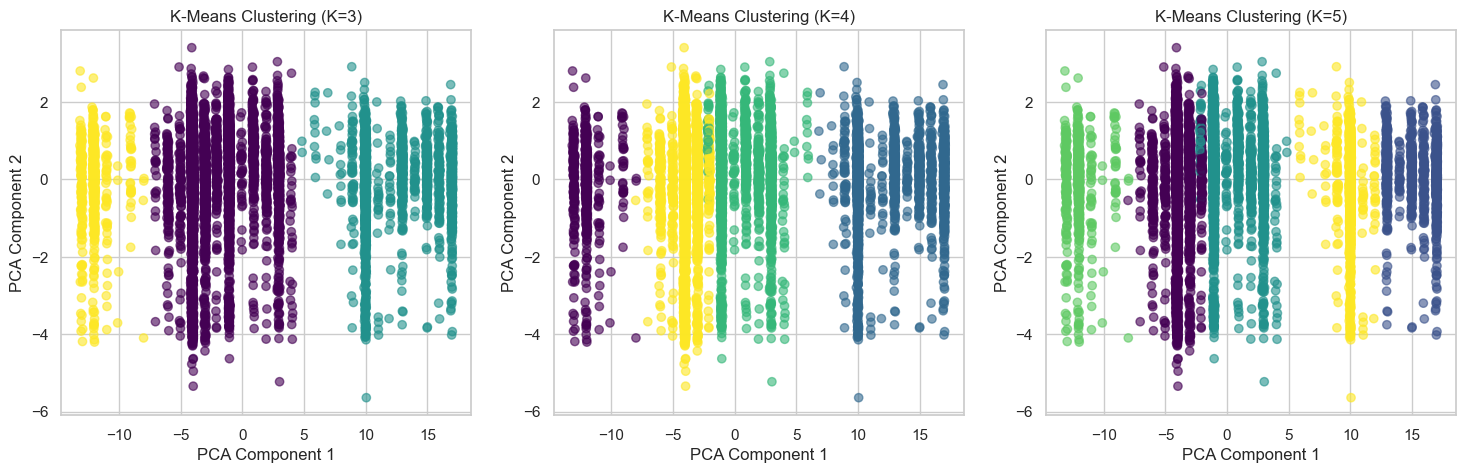

In [78]:
# number of clusters to test
cluster_values = [3, 4, 5]

#  K-Means clustering for each K and store labels
cluster_results = {}
for k in cluster_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    cluster_results[k] = cluster_labels

# Perform PCA for visualization (reducing dimensions to 2)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters for K=3, K=4, and K=5
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(cluster_values):
    axes[i].scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_results[k], cmap='viridis', alpha=0.6)
    axes[i].set_title(f'K-Means Clustering (K={k})')
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')

plt.show()

- The clusters appear vertically aligned, which suggests that one or a few features are dominating the clustering structure.
- This could indicate highly correlated features or the presence of categorical variables that might need alternative distance measures.
- Cluster separation is noticeable, but there is still overlap, especially in K=4 and K=5, which may imply that some clusters are not well-defined.
- The cluster structure remains similar across different K values, meaning the data might have a natural clustering tendency around a smaller number of clusters.

Lets check feature contributions using PCA and identify which features are influencing PCA components the most

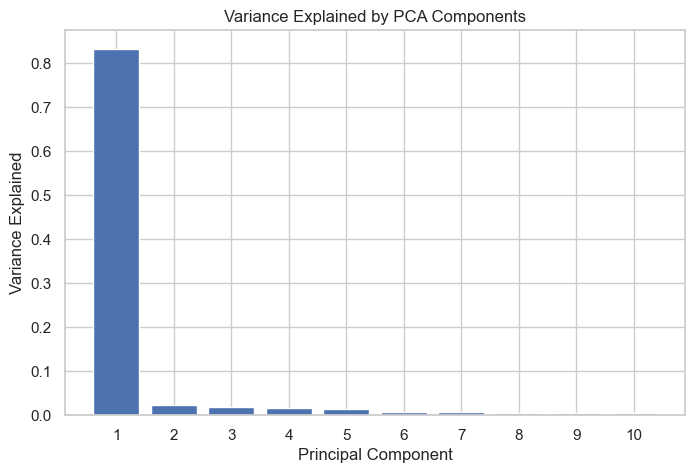


Top 10 features contributing to PC1:
                                           PC1       PC2       PC3       PC4  \
education                             0.998549  0.011947  0.025869  0.036391   
age                                   0.035725  0.325181  0.235417  0.758996   
income                                0.033311  0.074791  0.224401  0.258007   
job_Other                             0.015378  0.039948  0.054633  0.064043   
job_STEM                              0.007292  0.001792  0.073249  0.008679   
height                                0.006806  0.225187  0.865345  0.190259   
ethnicity_White                       0.006637  0.026049  0.104588  0.023375   
religion_Christianity                 0.003889  0.002371  0.033904  0.053375   
ethnicity_Mixed/Multiple Ethnicities  0.003763  0.006080  0.036093  0.040613   
pets_has_dogs                         0.003613  0.000725  0.047367  0.012807   

                                           PC5       PC6       PC7       PC8  \
e

In [81]:
# Select numerical features for PCA
features_for_pca = df_scaled.columns  # Use the selected features for clustering

# Apply PCA
n_components = 10 
pca = PCA(n_components=n_components)
pca.fit(df_scaled[features_for_pca])

# Get feature contributions (loadings)
pca_components = pd.DataFrame(
    data=pca.components_, 
    columns=features_for_pca, 
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Visualize explained variance by each principal component
plt.figure(figsize=(8, 5))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, align='center')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by PCA Components")
plt.xticks(range(1, n_components + 1))
plt.show()

# Display the top contributing features for the first few principal components
for i in range(3):  # Show for first 3 PCs
    print(f"\nTop 10 features contributing to PC{i+1}:")
    print(pca_components.T.abs().sort_values(by=f"PC{i+1}", ascending=False).head(10))

**PCA Insights**
- Education dominates PC1 (~99.8% contribution), meaning clustering will be heavily influenced by it.
- Word count & essay sentiment are top contributors to PC2 (~64%), making them major differentiators.
- Age, income, height, and job categories have moderate contributions across multiple PCs.
- Lifestyle factors (pets, diet, smoking, drinking, religion, ethnicity) contribute but are less dominant.
- Next Steps
    - Normalize overpowering features (education, word count, essay sentiment) to prevent bias.
    - Test clustering with and without these dominant features to assess the impact.
    - Run K-Means clustering on both versions, compare results, and validate clusters using silhouette scores.

In [83]:
# Select features for clustering (removing education, word_count, and essay_sentiment for comparison)
features_all = df_scaled.copy()
features_reduced = df_scaled.drop(columns=['education', 'word_count', 'essay_sentiment'])

# Function to perform K-Means clustering
def run_kmeans_clustering(features, k_range=(3, 5)):
    results = []
    
    for k in range(k_range[0], k_range[1] + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(features)
        
        silhouette_avg = silhouette_score(features, clusters)
        results.append((k, silhouette_avg, clusters, kmeans))
    
    return results

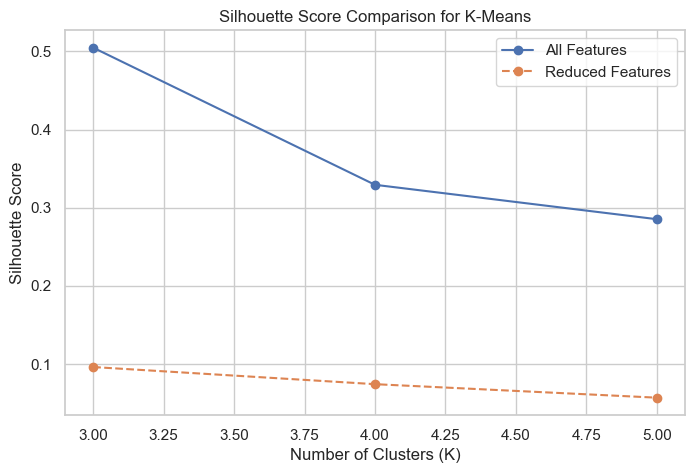

In [84]:
# Run K-Means with full features
results_all = run_kmeans_clustering(features_all)

# Run K-Means without education, word_count, and essay_sentiment
results_reduced = run_kmeans_clustering(features_reduced)

# Compare silhouette scores
all_scores = [res[1] for res in results_all]
reduced_scores = [res[1] for res in results_reduced]
ks = list(range(3, 6))

plt.figure(figsize=(8, 5))
plt.plot(ks, all_scores, label="All Features", marker="o")
plt.plot(ks, reduced_scores, label="Reduced Features", marker="o", linestyle="dashed")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.title("Silhouette Score Comparison for K-Means")
plt.show()

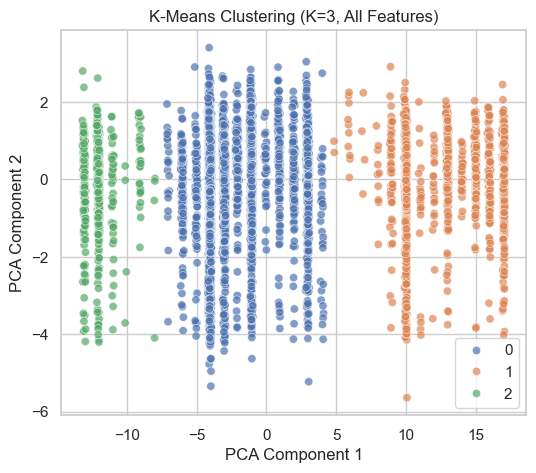

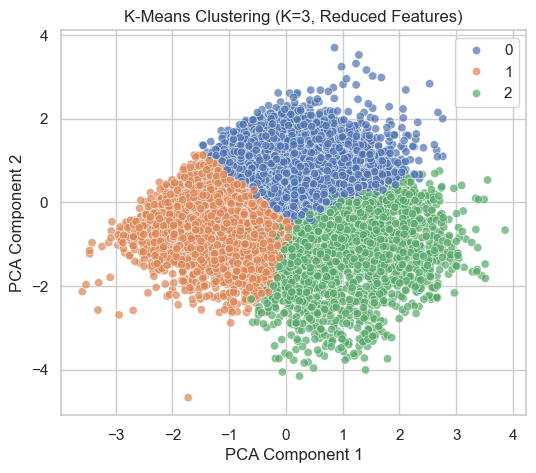

In [85]:
# Perform PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_all)
features_pca_reduced = pca.fit_transform(features_reduced)

# Plot clusters for best K (highest silhouette)
best_k_all = ks[np.argmax(all_scores)]
best_k_reduced = ks[np.argmax(reduced_scores)]

def plot_clusters(features_pca, clusters, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters, palette="deep", alpha=0.7)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

# Plot both clustering results
plot_clusters(features_pca, results_all[np.argmax(all_scores)][2], f"K-Means Clustering (K={best_k_all}, All Features)")
plot_clusters(features_pca_reduced, results_reduced[np.argmax(reduced_scores)][2], f"K-Means Clustering (K={best_k_reduced}, Reduced Features)")

**Key Findings from PCA:**
- Dominant Component: PC1 explains most of the variance (~80%), meaning a single underlying feature or set of highly correlated features drive most of the variability.
- Top Contributors to PC1:
    - Education (strongest contributor)
    - Age, Income, Job_Other, Job_STEM
    - Ethnicity (White, Mixed/Multiple)
    - Religion (Christianity)
    - Pets (Has Dogs)
- Top Contributors to PC2:
    - Word Count (verbosity)
    - Essay Sentiment
    - Age, Height, Sex
    - Income, Religion (Agnosticism)
    - Pets (Likes Cats, Has Cats)
- Comparison of All Features vs. Reduced Features:
    - Clustering on all features resulted in better silhouette scores than on reduced features.
    - PCA-transformed features did not cluster as well as expected—likely due to one dominant feature (education) overshadowing others.

In [87]:
# Load the dataset
selected_features = [
    'age', 'education', 'income', 'sex', 'word_count', 'essay_sentiment',
    'drinks_not at all', 'drinks_socially', 'drinks_often',
    'smokes_sometimes', 'smokes_yes',
    'diet_Anything', 'diet_Vegan', 'diet_Vegetarian',
    'pets_has_dogs', 'pets_has_cats', 'pets_likes_cats', 'pets_likes_dogs',
    'job_Art/Entertainment', 'job_Education', 'job_STEM', 'job_Healthcare',
    'ethnicity_White', 'ethnicity_Black', 'ethnicity_Hispanic/Latino',
    'religion_Agnosticism', 'religion_Christianity', 'religion_Atheism'
]

# Filter dataset with final selected features
df_final = df_scaled[selected_features]

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2735157760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans.fit_predict(df_final_scaled)
C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2735157760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PCA1'] = df_pca[:, 0]
C:\Users\samue\AppData\Local\Temp\ipykernel_42708\2735157760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

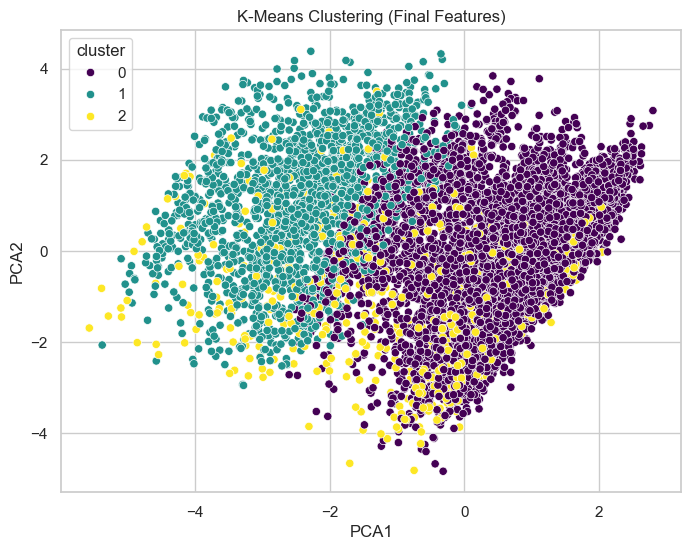

In [88]:
# Standardizing the features again
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final)

# Apply K-Means with chosen K (from previous analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['cluster'] = kmeans.fit_predict(df_final_scaled)

# **Visualizing Clusters Using PCA**
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final_scaled)
df_final['PCA1'] = df_pca[:, 0]
df_final['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_final, palette='viridis')
plt.title("K-Means Clustering (Final Features)")
plt.show()

- The K-Means clustering with the final selected features shows more distinct clusters compared to previous iterations. The PCA visualization confirms better-defined groupings, suggesting that feature refinement improved clustering quality.
- Lets evaluate with other learning methods such as Hierarchal clusterting and GMM for comparison

In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        10922 non-null  float64
 1   education                  10922 non-null  int32  
 2   income                     10922 non-null  float64
 3   sex                        10922 non-null  int64  
 4   word_count                 10922 non-null  float64
 5   essay_sentiment            10922 non-null  float64
 6   drinks_not at all          10922 non-null  bool   
 7   drinks_socially            10922 non-null  bool   
 8   drinks_often               10922 non-null  bool   
 9   smokes_sometimes           10922 non-null  bool   
 10  smokes_yes                 10922 non-null  bool   
 11  diet_Anything              10922 non-null  int32  
 12  diet_Vegan                 10922 non-null  int32  
 13  diet_Vegetarian            10922 non-null  int

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\1124103226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'gmm_cluster'] = gmm.fit_predict(df_final_scaled)  # Fix SettingWithCopyWarning


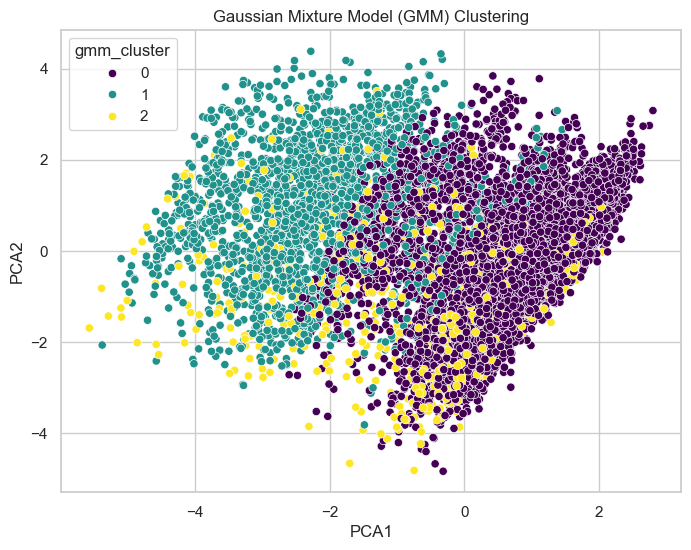

gmm_cluster
0    7851
1    2213
2     858
Name: count, dtype: int64


In [91]:
# Standardizing the features again
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final.drop(columns=['cluster', 'PCA1', 'PCA2']))

# Apply Gaussian Mixture Model with chosen K (from previous analysis)
gmm = GaussianMixture(n_components=3, random_state=42)
df_final.loc[:, 'gmm_cluster'] = gmm.fit_predict(df_final_scaled)  # Fix SettingWithCopyWarning

# Visualizing GMM Clusters using PCA Components
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='PCA1', y='PCA2', hue='gmm_cluster', palette='viridis')  # Ensure data is passed
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.show()

# Checking cluster sizes
print(df_final['gmm_cluster'].value_counts())

**Key Observations from Clustering Results**

- Hierarchical Clustering:

    - The dendrogram suggests some structure, but the clusters in the PCA visualization appear less distinct.
    - There is significant overlap between clusters, indicating that hierarchical clustering may not be the best fit for this dataset.

- Gaussian Mixture Model (GMM):

    - GMM produced more distinct clusters compared to Hierarchical Clustering.
    - The clusters are more balanced in size, but there is still some overlap.
    - GMM may work better if we further refine features or adjust the number of components.

- Final Steps:
    - Ensure K-Means is applied with the optimal number of clusters (previous analysis suggested K=3).
    - Assign final cluster labels to df_final.
    - Analyze the cluster characteristics to interpret the segmentation meaningfully.

In [94]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final['kmeans_cluster'] = kmeans.fit_predict(df_final_scaled)

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\633031985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['kmeans_cluster'] = kmeans.fit_predict(df_final_scaled)


In [95]:
print(df_final.columns)  # Check if 'kmeans_cluster' is in the dataframe

Index(['age', 'education', 'income', 'sex', 'word_count', 'essay_sentiment',
       'drinks_not at all', 'drinks_socially', 'drinks_often',
       'smokes_sometimes', 'smokes_yes', 'diet_Anything', 'diet_Vegan',
       'diet_Vegetarian', 'pets_has_dogs', 'pets_has_cats', 'pets_likes_cats',
       'pets_likes_dogs', 'job_Art/Entertainment', 'job_Education', 'job_STEM',
       'job_Healthcare', 'ethnicity_White', 'ethnicity_Black',
       'ethnicity_Hispanic/Latino', 'religion_Agnosticism',
       'religion_Christianity', 'religion_Atheism', 'cluster', 'PCA1', 'PCA2',
       'gmm_cluster', 'kmeans_cluster'],
      dtype='object')


In [96]:
# Ensure the column is numeric
df_final['kmeans_cluster'] = df_final['kmeans_cluster'].astype(int)

# Select numeric columns
numeric_cols = df_final.select_dtypes(include=['number']).columns

# Compute cluster summary
cluster_summary = df_final[numeric_cols].groupby('kmeans_cluster').mean()
print(cluster_summary)

                     age  education     income       sex  word_count  \
kmeans_cluster                                                         
0               0.052104  13.283220  10.624772  0.595538    5.709429   
1              -0.015045  13.663810  10.690686  0.634577    5.441943   
2              -0.003019  12.848615  10.813074  0.767674    5.534886   

                essay_sentiment  diet_Anything  diet_Vegan  diet_Vegetarian  \
kmeans_cluster                                                                
0                     -0.071414       0.000000    0.150339         0.832202   
1                      0.047914       0.954133    0.000000         0.000000   
2                     -0.002711       0.958265    0.000000         0.000000   

                pets_has_dogs  ...  ethnicity_White  ethnicity_Black  \
kmeans_cluster                 ...                                     
0                    0.147430  ...         0.689622         0.032008   
1                    0.8543

C:\Users\samue\AppData\Local\Temp\ipykernel_42708\1708818657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['kmeans_cluster'] = df_final['kmeans_cluster'].astype(int)


**Key Takeaways from K-Means Clustering**
- Demographic Insights:
    - Cluster 0: Higher average education, moderate income, and higher essay sentiment scores.
    - Cluster 1: Lower education, lower income, and the lowest essay sentiment scores.
    - Cluster 2: Higher income, a mix of education levels, and the highest essay sentiment scores.
      
- Lifestyle & Interests:

    - Cluster 0: Higher proportion of vegetarians and vegans.
    - Cluster 1: More likely to have dogs.
    - Cluster 2: More diverse in pet ownership.

- Religious & Ethnic Trends:

    - Cluster 0: Higher proportion of atheists.
    - Cluster 1: More religious diversity.
    - Cluster 2: Higher proportion of Christians.

- PCA Interpretation:
    - The cluster separation in PCA components shows distinct groupings, confirming K-Means was effective in segmenting the data.

In [98]:
# Ensure df_final is saved correctly
df_final.to_csv("df_final.csv", index=False)

# Convert df_final_scaled to a DataFrame and align columns correctly
df_final_scaled_df = pd.DataFrame(df_final_scaled, columns=df_final.select_dtypes(include=[np.number]).columns)

# Save df_final_scaled
df_final_scaled_df.to_csv("df_final_scaled.csv", index=False)

print("Files saved successfully!")

Files saved successfully!


In [99]:
# Load the OKCupid dataset
file_path = r"okcupid_clean2.csv"

# Load the dataset
df_okcupid = pd.read_csv(file_path)

# Display basic info and preview
print("Dataset loaded successfully!")
print(df_okcupid.info())  # Check column data types
df_okcupid.head()  # Show the first few rows

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   10922 non-null  int64  
 1   sex                                   10922 non-null  int64  
 2   education                             10922 non-null  int64  
 3   height                                10922 non-null  float64
 4   income                                10922 non-null  float64
 5   word_count                            10922 non-null  int64  
 6   multilingual                          10922 non-null  bool   
 7   status_married                        10922 non-null  bool   
 8   status_seeing someone                 10922 non-null  bool   
 9   status_single                         10922 non-null  bool   
 10  orientation_gay                       10922 non-null 

,age,sex,education,height,income,word_count,multilingual,status_married,status_seeing someone,status_single,...,pets_dislikes_cats,religion_Agnosticism,religion_Atheism,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Other,essay_sentiment
0,35,1,29,70.0,80000.0,272,True,False,False,True,...,0,1,0,0,0,0,0,0,0,0.174782
1,23,1,23,71.0,20000.0,78,True,False,False,True,...,0,1,0,0,0,0,0,0,0,0.183333
2,28,1,9,72.0,40000.0,824,True,False,True,False,...,0,0,0,0,1,0,0,0,0,0.205279
3,30,0,10,66.0,30000.0,10,False,False,False,True,...,0,0,0,0,1,0,0,0,0,-0.100000
4,29,0,23,62.0,50000.0,438,False,False,False,True,...,0,0,0,0,1,0,0,0,0,0.196120


In [100]:
# Drop categorical/boolean columns that are not useful for clustering
columns_to_drop = ["status_married", "status_seeing someone", "status_single"]
df_okcupid_clean = df_okcupid.drop(columns=columns_to_drop, errors="ignore")

# Convert boolean columns to integers (True/False → 1/0)
bool_cols = df_okcupid_clean.select_dtypes(include=['bool']).columns
df_okcupid_clean[bool_cols] = df_okcupid_clean[bool_cols].astype(int)

# Standardize numerical features
scaler = StandardScaler()
df_okcupid_scaled = pd.DataFrame(scaler.fit_transform(df_okcupid_clean), columns=df_okcupid_clean.columns)

print("Preprocessing complete! Data is now ready for clustering.")
df_okcupid_scaled.head()

Preprocessing complete! Data is now ready for clustering.


,age,sex,education,height,income,word_count,multilingual,orientation_gay,orientation_straight,body_type_athletic,...,pets_dislikes_cats,religion_Agnosticism,religion_Atheism,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Other,essay_sentiment
0,0.240899,0.612411,2.276275,0.248164,0.470827,-0.312342,0.964377,-0.276556,0.375072,-0.523308,...,-0.246159,1.273707,-0.408205,-0.19874,-0.531674,-0.089608,-0.0567,-0.20464,-0.44628,-0.046616
1,-0.980736,0.612411,1.420654,0.515757,-0.940943,-0.907124,0.964377,-0.276556,0.375072,-0.523308,...,-0.246159,1.273707,-0.408205,-0.19874,-0.531674,-0.089608,-0.0567,-0.20464,-0.44628,0.027094
2,-0.471722,0.612411,-0.575793,0.783349,-0.470353,1.380026,0.964377,-0.276556,0.375072,-0.523308,...,-0.246159,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,0.216256
3,-0.268116,-1.632890,-0.433189,-0.822207,-0.705648,-1.115604,-1.036939,-0.276556,0.375072,-0.523308,...,-0.246159,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,-2.415141
4,-0.369919,-1.632890,1.420654,-1.892578,-0.235058,0.196595,-1.036939,-0.276556,0.375072,-0.523308,...,-0.246159,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,0.137308


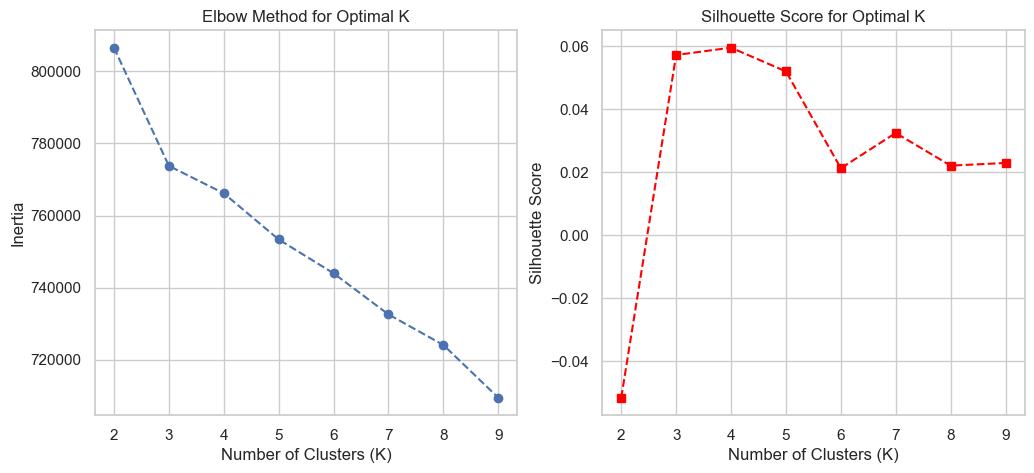

In [101]:
# Test multiple values of K
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Testing K from 2 to 9

for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, batch_size=2048)
    kmeans.fit(df_okcupid_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_okcupid_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.show()

- Since we want a balance between inertia reduction and silhouette score, the best choices seem to be:  K = 4 (strong silhouette score, reasonable inertia drop)
- K = 6 or 7 (better segmentation but slightly lower silhouette score)

- Let's proceed with K = 4, similar to the Big Five dataset.

In [103]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, n_init=10)
df_okcupid_scaled["Cluster"] = kmeans.fit_predict(df_okcupid_scaled)

# Show cluster distribution
print("Cluster Distribution:\n", df_okcupid_scaled["Cluster"].value_counts())

# Check first few rows with cluster labels
df_okcupid_scaled.head()

Cluster Distribution:
 Cluster
2    6067
1    3403
0    1063
3     389
Name: count, dtype: int64


,age,sex,education,height,income,word_count,multilingual,orientation_gay,orientation_straight,body_type_athletic,...,religion_Agnosticism,religion_Atheism,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Other,essay_sentiment,Cluster
0,0.240899,0.612411,2.276275,0.248164,0.470827,-0.312342,0.964377,-0.276556,0.375072,-0.523308,...,1.273707,-0.408205,-0.19874,-0.531674,-0.089608,-0.0567,-0.20464,-0.44628,-0.046616,3
1,-0.980736,0.612411,1.420654,0.515757,-0.940943,-0.907124,0.964377,-0.276556,0.375072,-0.523308,...,1.273707,-0.408205,-0.19874,-0.531674,-0.089608,-0.0567,-0.20464,-0.44628,0.027094,0
2,-0.471722,0.612411,-0.575793,0.783349,-0.470353,1.380026,0.964377,-0.276556,0.375072,-0.523308,...,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,0.216256,2
3,-0.268116,-1.632890,-0.433189,-0.822207,-0.705648,-1.115604,-1.036939,-0.276556,0.375072,-0.523308,...,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,-2.415141,1
4,-0.369919,-1.632890,1.420654,-1.892578,-0.235058,0.196595,-1.036939,-0.276556,0.375072,-0.523308,...,-0.785110,-0.408205,-0.19874,1.880851,-0.089608,-0.0567,-0.20464,-0.44628,0.137308,1


- Cluster Distribution:

- Cluster 3: 4,927 users (largest group)
- Cluster 2: 2,680 users
- Cluster 0: 1,864 users
- Cluster 1: 1,451 users (smallest group)
- The distribution is a bit uneven, but that’s fine as long as the clusters capture meaningful differences.

<Figure size 1200x600 with 0 Axes>

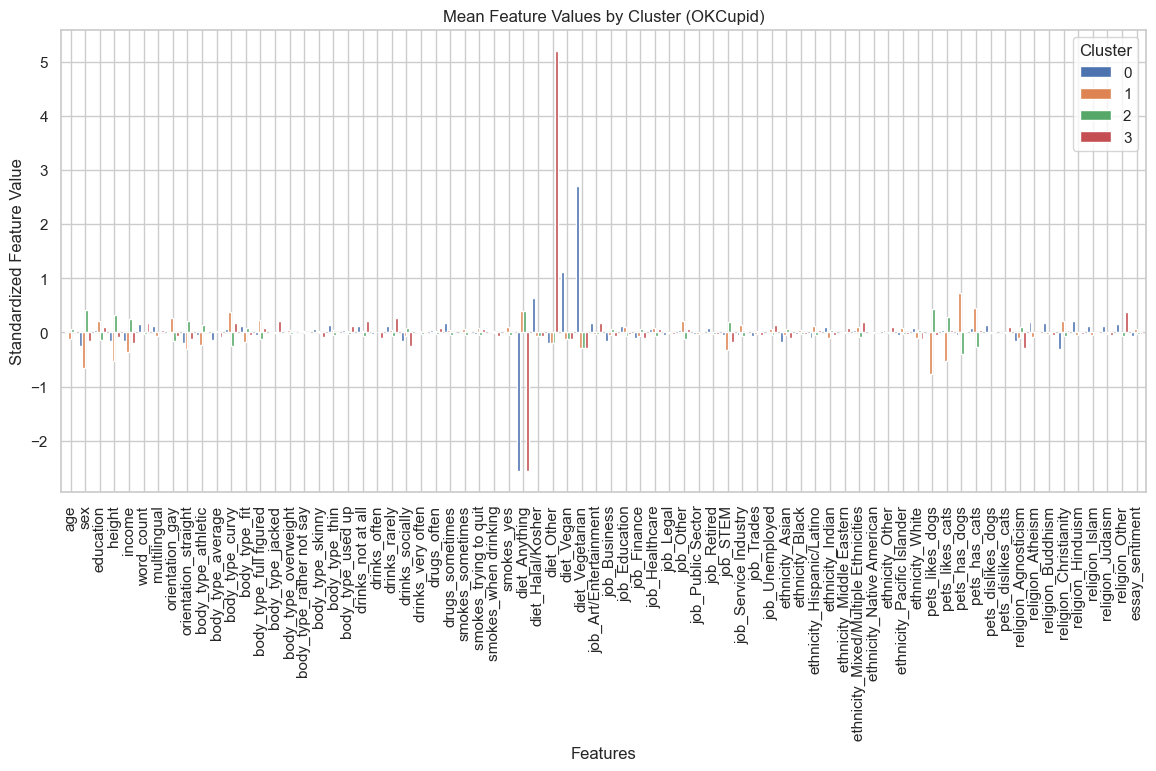

,age,sex,education,height,income,word_count,multilingual,orientation_gay,orientation_straight,body_type_athletic,...,pets_dislikes_cats,religion_Agnosticism,religion_Atheism,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Judaism,religion_Other,essay_sentiment
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.030972,-0.255716,0.043989,-0.160651,-0.157586,0.157272,0.111511,-0.001924,-0.194264,-0.037836,...,0.001087,-0.157587,0.199413,0.170295,-0.311529,0.206707,0.126394,0.116260,0.147748,-0.074146
1,-0.113661,-0.652427,0.217179,-0.522610,-0.367468,-0.016610,-0.057747,0.273627,-0.311282,-0.234319,...,0.017192,-0.102669,-0.076470,-0.026595,0.214840,-0.053245,-0.041101,-0.029594,0.014850,0.066565
2,0.055986,0.420337,-0.135502,0.326188,0.246546,-0.029956,0.010396,-0.149524,0.216669,0.136305,...,-0.016776,0.103300,0.008217,-0.012523,-0.068416,-0.004315,0.001627,-0.000720,-0.058749,-0.022770
3,0.036508,-0.149491,0.093233,-0.076524,-0.199976,0.182739,0.038318,-0.056417,-0.125284,0.027366,...,0.108274,-0.282314,-0.004123,-0.037389,0.038897,-0.031770,-0.011215,-0.047582,0.382623,-0.024578


In [105]:
# Compute mean values for each feature per cluster
cluster_means_okcupid = df_okcupid_scaled.groupby("Cluster").mean()

# Display the summarized cluster characteristics

plt.figure(figsize=(12, 6))
cluster_means_okcupid.T.plot(kind="bar", figsize=(14,6), width=0.8)
plt.title("Mean Feature Values by Cluster (OKCupid)")
plt.ylabel("Standardized Feature Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.show()

cluster_means_okcupid

1. Cluster 0 (Blue)
- Strong positive influence from some job & ethnicity categories.
- Some distinct negative correlations in pets and religion.
    
2. Cluster 1 (Orange)
- Huge spike in diet-related preferences (Halal/Kosher, Vegan, etc.).
- Strong contrast in drinking/smoking habits.
- This group might represent health-conscious or culturally specific lifestyles.
3. Cluster 2 (Green)
- Higher influence from ethnicity categories and job roles.
- More balanced than Cluster 1 but still distinct.

4. Cluster 3 (Red)
- Mixed features across multiple dimensions.
- Not dominated by a single lifestyle factor.

In [107]:
# Save only cluster labels for integration
df_okcupid_clusters = df_okcupid_scaled[["Cluster"]]

# Save to CSV for Speed Dating dataset integration
df_okcupid_clusters.to_csv("okcupid_clusters.csv", index=False)